# Architect

**Import needed libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import choice
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

**Perceptrons and Activation Functions**

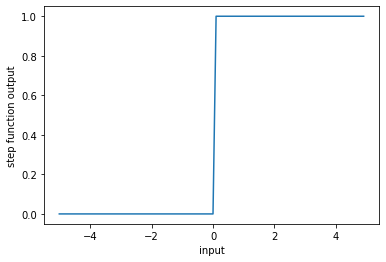

In [2]:
# Define the activation function
unit_step = lambda x: 0 if x < 0 else 1

# Vectorize the function (using an array)
unit_step_v = np.vectorize(unit_step)

# Creating array objects
x = np.arange(-5, 5, 0.1)
y = unit_step_v(x)

# Plot
plt.plot(x, y)
plt.xlabel('input'); plt.ylabel('step function output');

**Perceptron OR gate training**

In [3]:
# Data ('OR' gate)
# tuple format: ([x1, x2, bias], expected)
training_data = [
    (np.array([0,0,1]), 0),
    (np.array([0,1,1]), 1),
    (np.array([1,0,1]), 1),
    (np.array([1,1,1]), 1),
]

In [4]:
# https://blog.dbrgn.ch/2013/3/26/perceptrons-in-python/

# Initaiate random weights
w = np.random.rand(3)

# Errors being stored for plotting
errors = []

# Learning rate (the size of "jumps" when updating the weights)
learning_rate = 0.2

# Number of iterations/weight updates
n = 50

# Learning loop
for i in range(n):
    # Select a random item from the training data
    x, expected = choice(training_data)
    # Neuron calculation (dot product of weights and input)
    result = np.dot(w, x)
    # Compare to the expected result
    error = expected - unit_step(result)
    errors.append(error)
    # Update the weights
    w = w + learning_rate * error * x

# Test the perceptron with the "learned" weights
for x, _ in training_data:
    result = np.dot(x, w)
    print("{}: {} -> {}".format(x[:2], result, unit_step(result)))

[0 0]: -0.06617329690920748 -> 0
[0 1]: 0.2273614318868552 -> 1
[1 0]: 0.43996186750662336 -> 1
[1 1]: 0.733496596302686 -> 1


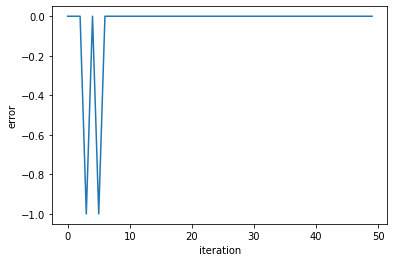

In [5]:
# Plot error as a function of iteration
iteration = np.arange(0, n, 1)

plt.plot(iteration, errors)
plt.xlabel('iteration'); plt.ylabel('error');

**Perceptron with And Gate**

In [6]:
# Data ('OR' gate)
# tuple format: ([x1, x2, bias], expected)
training_data = [
    (np.array([0,0,1]), 0),
    (np.array([0,1,1]), 0),
    (np.array([1,0,1]), 0),
    (np.array([1,1,1]), 1),
]

In [7]:
# https://blog.dbrgn.ch/2013/3/26/perceptrons-in-python/

# Initaiate random weights
w = np.random.rand(3)

# Errors being stored for plotting
errors = []

# Learning rate (the size of "jumps" when updating the weights)
learning_rate = 0.2

# Number of iterations/weight updates
n = 50

# Learning loop
for i in range(n):
    # Select a random item from the training data
    x, expected = choice(training_data)
    # Neuron calculation (dot product of weights and input)
    result = np.dot(w, x)
    # Compare to the expected result
    error = expected - unit_step(result)
    errors.append(error)
    # Update the weights
    w = w + learning_rate * error * x

# Test the perceptron with the "learned" weights
for x, _ in training_data:
    result = np.dot(x, w)
    print("{}: {} -> {}".format(x[:2], result, unit_step(result)))

[0 0]: -0.4796182950527597 -> 0
[0 1]: -0.040777434724938 -> 0
[1 0]: -0.33954171125772253 -> 0
[1 1]: 0.09929914907009912 -> 1


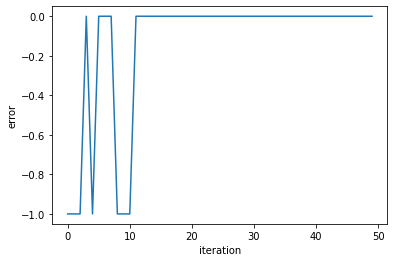

In [8]:
# Plot error as a function of iteration
iteration = np.arange(0, n, 1)

plt.plot(iteration, errors)
plt.xlabel('iteration'); plt.ylabel('error');

**Keras Classes**

In [48]:
# Create the OR operator
# the tutorial only had one case of the and gate output = 0 and 3 cases where out put was 1. I am sure there are many ways 
# to structure and train the network but in this case given the unbalacned data the network learned to always predict 1. in my 
# implementation I have added more cases of the output equalling 0 as well as spread the order of the outputs to be more random (0,0,1,1,0,1)
# that being said it does seem to have less certainy when predicting a value and depending on out the random weights are inilized determens the models sucess
data = { 'x1': [0,0,1,0,0,1],
         'x2': [0,0,0,1,0,1],
         'y':  [0,0,1,1,0,1]
       }

df = pd.DataFrame.from_dict(data).astype('int')
display(df.head())

# Separate feature and target
X = df[['x1', 'x2']].values
y = df['y'].values

,x1,x2,y
0,0,0,0
1,0,0,0
2,1,0,1
3,0,1,1
4,0,0,0


In [49]:
# Perceptron model with keras
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X,y, epochs=10);

Epoch 1/10
1/1 [==============================] - 1s 511ms/step - loss: 0.5241 - accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 0.5239 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 0.5236 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/step - loss: 0.5233 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 0.5230 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 0.5227 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 0.5225 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 0.5222 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 0.5219 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 4ms/step - loss: 0.5216 - accuracy: 1.0000


In [50]:
# Evaluate the model
print('Model accuracy: ', model.evaluate(X, y)[1]*100)
model.predict(X)

1/1 [==============================] - 0s 107ms/step - loss: 0.5213 - accuracy: 1.0000
Model accuracy:  100.0


array([[0.4975008],
       [0.4975008],
       [0.8004629],
       [0.5268683],
       [0.4975008],
       [0.8185811]], dtype=float32)

**Keras with larger dataset**

In [54]:
# Set the data var for the data location
data = 'data/pima-indians-diabetes.names.txt'

# Load the dataset
dataset = np.loadtxt(data, delimiter=',')

# Split into input (X) and output (y) variables
# (8 input columns, 1 target column)
X = dataset[:,0:8]
y = dataset[:,8]

**Define the Layers**

8 inputs so 8 input nodes. the other layers have to be experimented with

In [55]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

**Compile the model**

In [56]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

**Fit the model**

In [60]:
# Fit the keras model on the dataset
# (remove the verbose=0 argument to see the output)
model.fit(X, y, epochs=1000, batch_size=10, verbose=1);

Epoch 1/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4706 - accuracy: 0.7656
Epoch 2/1000
77/77 [==============================] - 0s 2ms/step - loss: 0.4710 - accuracy: 0.7656
Epoch 3/1000
77/77 [==============================] - 0s 2ms/step - loss: 0.4674 - accuracy: 0.7643
Epoch 4/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4741 - accuracy: 0.7669
Epoch 5/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4677 - accuracy: 0.7656
Epoch 6/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4658 - accuracy: 0.7630
Epoch 7/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4718 - accuracy: 0.7695
Epoch 8/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4632 - accuracy: 0.7656
Epoch 9/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4673 - accuracy: 0.7826
Epoch 10/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4781 - accuracy: 0.7630

**Evaluate the Model**

In [61]:
print('Model accuracy: ', model.evaluate(X, y)[1]*100)

24/24 [==============================] - 0s 930us/step - loss: 0.3811 - accuracy: 0.8086
Model accuracy:  80.859375
